In [50]:
# Imports
import numpy as np
import pandas as pd 
import sys
import os
import pickle

from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [22]:
# Add paths
binary = "../bin/"

In [71]:
# load data 
data = np.load(binary+"data_function=TIME_SERIES_DAILY&symbol=MSFT&outputsize=full&datatype=json&apikey=demo_2000-01-03_2018-07-18.npy")
timestamp = pickle.load(open(binary+"timestamps_function=TIME_SERIES_DAILY&symbol=MSFT&outputsize=full&datatype=json&apikey=demo_2000-01-03_2018-07-18.pickle", 'rb'))

In [74]:
# Create a pandas dataframe
print(data.shape)

data_frame = pd.DataFrame(data=timestamp,       
                          columns=["date"])
data_frame["opening"] = data[:, 0]

data_frame['date'] = pd.DatetimeIndex(data_frame['date'])

data_frame= data_frame.rename(columns={'date': 'ds',
                        'opening': 'y'})
print(data_frame.head(5))

data_frame.dtypes

(4665, 5)
          ds       y
0 2018-07-18  105.94
1 2018-07-17  104.61
2 2018-07-16  105.40
3 2018-07-13  104.37
4 2018-07-12  102.77


ds    datetime64[ns]
y            float64
dtype: object

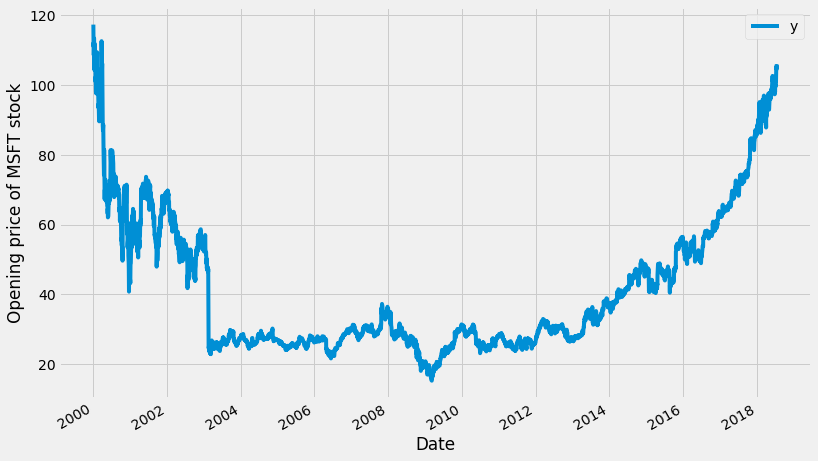

In [84]:
ax = data_frame.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Opening price of MSFT stock')
ax.set_xlabel('Date')

plt.show()

In [76]:
# Use prophet for prediction
my_model = Prophet(interval_width=0.8)
my_model.fit(data_frame)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


/home/fasc/miniconda3/envs/py36/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [77]:
future_dates = my_model.make_future_dataframe(periods=5, freq='D')
future_dates.tail()


,ds
4665,2018-07-19
4666,2018-07-20
4667,2018-07-21
4668,2018-07-22
4669,2018-07-23


In [78]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4665,2018-07-19,89.735275,83.962276,95.199765
4666,2018-07-20,89.772652,84.324019,95.684071
4667,2018-07-21,97.617348,92.093069,103.605947
4668,2018-07-22,97.590318,91.849748,103.855039
4669,2018-07-23,89.706182,83.932061,95.574772


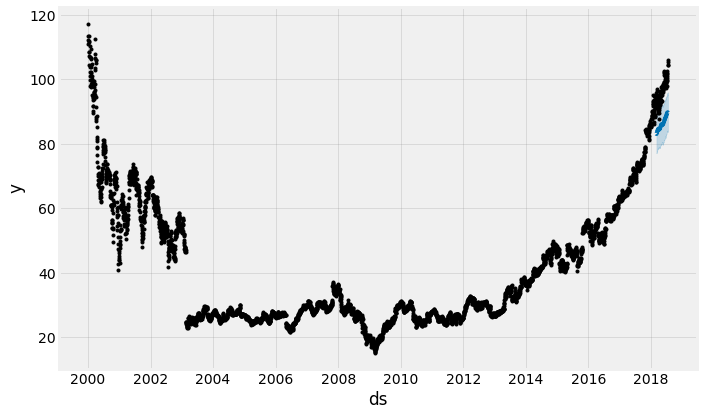

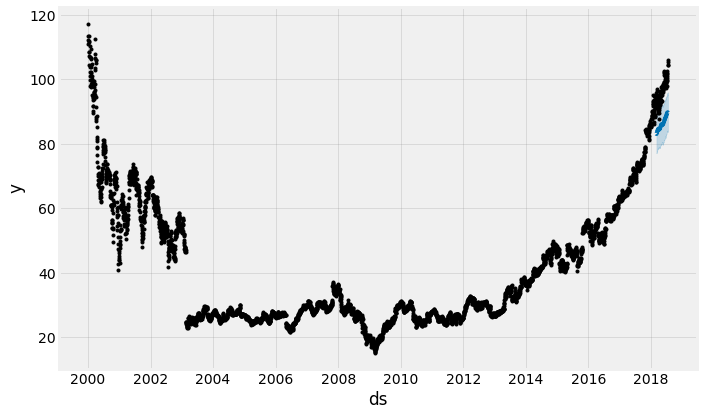

In [82]:
my_model.plot(forecast[-100:-5],
              uncertainty=True)

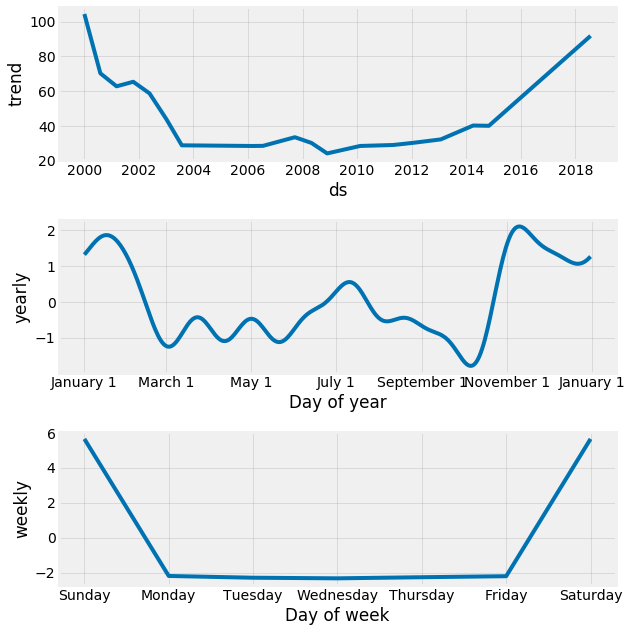

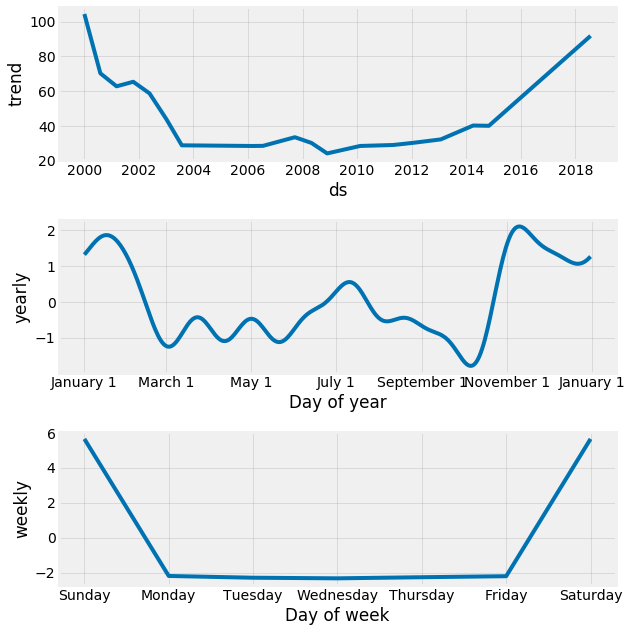

In [80]:
my_model.plot_components(forecast)